# Mock data

C:\Users\xyz\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


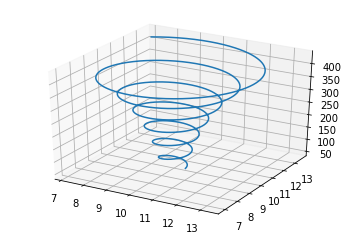

In [46]:
import matplotlib as mpl
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import matplotlib.pyplot as plt
from math import exp,sin,cos
from pylab import *
from sklearn.preprocessing import scale

mpl.rcParams['legend.fontsize'] = 10

fig = plt.figure()
ax = fig.gca(projection='3d')
a=0.05
b=0.05
# took the liberty of reducing the max value for th 
# as it was giving you values of the order of e42
th=np.linspace(0, 40, 10000)  
x=10*a*exp(b*th)*cos(th) + 10
y=10*a*exp(b*th)*sin(th) + 10
z=10*th + 40  # creating the z array with the same length as th
ax.plot(x, y, z)  # adding z as an argument for the plot
ax.legend()
plt.show()

In [47]:
import xlwt
import os
from xlwt import Workbook
#os.remove("ISRO.xls")
wb = Workbook()
sheet1 = wb.add_sheet('Sheet 1')
sheet1.write(0, 0, 'X Coordinate') 
sheet1.write(0, 1, 'Y Coordinate') 
sheet1.write(0, 2, 'z Coordinate')
sheet1.write(0, 3, 'Time')
for i in range(1,9990):
    sheet1.write(i, 0, x[i-1]) 
for j in range(1,9990):
    sheet1.write(j,1,y[j-1])
for k in range(1,9990):
    sheet1.write(k,2,z[k-1])
for t in range(1,9990):
    sheet1.write(t,3,t)
    
wb.save('ISRO.xls')

# Reshape data 

In [48]:
x = np.reshape(x,(x.shape[0],1))
y = np.reshape(y,(y.shape[0],1))
z = np.reshape(z,(z.shape[0],1))
th = np.reshape(th,(th.shape[0],1))

# Normalize and Concatenate data

In [49]:
x = scale(x)
y = scale(y)
z = scale(z)
th = scale(th)

In [50]:
x_final = x[0:x.shape[0]-2,:]    #x before  x(t)                                                                      
y_final = y[0:y.shape[0]-2,:]
z_final = z[0:z.shape[0]-2,:]
th_final = th[1:th.shape[0]-1,:]

x_train_final = x[1:x.shape[0]-1,:] #x after; <-- this follows x final x(t+1)
y_train_final = y[1:y.shape[0]-1,:]
z_train_final = z[1:z.shape[0]-1,:]

In [51]:
xy = np.concatenate((x_final, y_final), axis=1)
xyz = np.concatenate((xy, z_final), axis=1)
X = np.concatenate((xyz, th_final), axis=1)

In [52]:
xy_train = np.concatenate((x_train_final, y_train_final), axis=1)
Y = np.concatenate((xy_train, z_train_final), axis=1)

### sanity check

In [53]:
X.shape, Y.shape

((9998, 4), (9998, 3))

# Model architecture

In [54]:
from keras.layers import Dense
from keras.layers import LSTM

from keras.models import Sequential

model = Sequential()

model.add(Dense(16, input_dim = 4, activation='relu'))
model.add(Dense(8, activation = 'relu'))
model.add(Dense(3))

model.compile(loss = 'mean_squared_error', optimizer = 'adam', metrics = ['accuracy'])

# Train model

In [55]:
model.fit(X,Y, epochs=100)

Epoch 1/100
9998/9998 [==============================] - 2s 233us/step - loss: 0.4802 - acc: 0.7154
Epoch 2/100
9998/9998 [==============================] - 1s 55us/step - loss: 0.0193 - acc: 0.9607
Epoch 3/100
9998/9998 [==============================] - 1s 59us/step - loss: 0.0060 - acc: 0.9674
Epoch 4/100
9998/9998 [==============================] - 1s 57us/step - loss: 0.0038 - acc: 0.9751
Epoch 5/100
9998/9998 [==============================] - 1s 60us/step - loss: 0.0025 - acc: 0.9775
Epoch 6/100
9998/9998 [==============================] - 1s 60us/step - loss: 0.0017 - acc: 0.9780
Epoch 7/100
9998/9998 [==============================] - 1s 71us/step - loss: 0.0013 - acc: 0.9804
Epoch 8/100
9998/9998 [==============================] - 1s 70us/step - loss: 9.6592e-04 - acc: 0.9852
Epoch 9/100
9998/9998 [==============================] - 1s 74us/step - loss: 7.7811e-04 - acc: 0.9891
Epoch 10/100
9998/9998 [==============================] - 1s 59us/step - loss: 6.3202e-04 - acc: 0.9

9998/9998 [==============================] - 1s 55us/step - loss: 6.8464e-06 - acc: 0.9994
Epoch 80/100
9998/9998 [==============================] - 0s 50us/step - loss: 9.4653e-06 - acc: 0.9988
Epoch 81/100
9998/9998 [==============================] - 1s 56us/step - loss: 8.1511e-06 - acc: 0.9989
Epoch 82/100
9998/9998 [==============================] - 0s 50us/step - loss: 6.5234e-06 - acc: 0.9991
Epoch 83/100
9998/9998 [==============================] - 1s 53us/step - loss: 5.0828e-06 - acc: 0.9992
Epoch 84/100
9998/9998 [==============================] - 1s 52us/step - loss: 8.1733e-06 - acc: 0.9990
Epoch 85/100
9998/9998 [==============================] - 0s 50us/step - loss: 5.2346e-06 - acc: 0.9994
Epoch 86/100
9998/9998 [==============================] - 1s 55us/step - loss: 9.4516e-06 - acc: 0.9990
Epoch 87/100
9998/9998 [==============================] - 1s 50us/step - loss: 7.8140e-06 - acc: 0.9989
Epoch 88/100
9998/9998 [==============================] - 1s 55us/step - loss

In [37]:
th

array([  0.00000000e+00,   4.00040004e-03,   8.00080008e-03, ...,
         3.99919992e+01,   3.99959996e+01,   4.00000000e+01])

In [57]:
predictions = model.predict(X)
# round predictions
rounded = [(x[0]) for x in predictions]
print(rounded)

[0.34867355, 0.34874275, 0.34880534, 0.34886119, 0.34891114, 0.34895453, 0.34899166, 0.34902242, 0.34904656, 0.34906462, 0.34907618, 0.34908137, 0.34908018, 0.34907272, 0.34905878, 0.34903839, 0.34901199, 0.34897849, 0.34893921, 0.34889349, 0.34884122, 0.34878257, 0.34871742, 0.34864607, 0.34856811, 0.34848389, 0.34839329, 0.34829625, 0.34819266, 0.34808263, 0.34796646, 0.34784362, 0.34771475, 0.34757921, 0.34743711, 0.34728882, 0.3471339, 0.34697273, 0.34680524, 0.3466312, 0.3464509, 0.34626403, 0.34607068, 0.34587112, 0.34566507, 0.34545276, 0.34523377, 0.34500834, 0.34477684, 0.3445389, 0.34429422, 0.34404328, 0.34378615, 0.34352252, 0.34325245, 0.34297577, 0.342693, 0.3424038, 0.34210798, 0.34180626, 0.34149757, 0.34118256, 0.34086165, 0.340534, 0.34020004, 0.33985969, 0.33951315, 0.33915994, 0.33880058, 0.33843485, 0.33806279, 0.33768442, 0.33729926, 0.33690843, 0.33651087, 0.33610699, 0.33569697, 0.33528039, 0.33485755, 0.33442834, 0.33399281, 0.33355096, 0.33310297, 0.33264861, 